### Analyzing bumps

In [1]:
import pandas as pd
import seaborn as sns

from modules.plotting_scripts import plot_surprisals

In [2]:
def count_bumps(diffs):
    if len(diffs) < 4:
        raise ValueError(f"Series length {len(diffs)} is less than the required length 4.")
    
    n_bumps = 0
    change = True

    # determine the sign at index 1
    # (True for negative, False for positive)
    initial_sign = diffs.iloc[1] < 0    

    # count the number of times the sign changes into the opposite
    for diff in diffs.iloc[2:]:
        current_sign = diff < 0
        if current_sign == initial_sign:
            change = True
        elif current_sign != initial_sign and change:
            n_bumps += 1
            change = False

    # if the sign at the last step is the same as the initial sign, add 1 to the number of bumps
    last_sign = diffs.iloc[-1] < 0
    n_bumps += 1 if last_sign == initial_sign else 0

    return n_bumps

In [3]:
wikitext_surprisals = '../results/lexique_results/shuffled_bert_surprisals.txt'
surprisals = pd.read_csv(wikitext_surprisals, delimiter='\t')

surprisals = (surprisals
    .sort_values(['Token', 'Steps'])
    .groupby('Token')
    .apply(lambda x: x.assign(MeanSurprisalDiff = x['MeanSurprisal'].diff().fillna(0), 
                              StdevSurprisalDiff = x['StdevSurprisal'].diff().fillna(0)))
    .reset_index(drop=True))

surprisals.insert(0, 'Token', surprisals.pop('Token'))

/tmp/ipykernel_3298801/1068651439.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(MeanSurprisalDiff = x['MeanSurprisal'].diff().fillna(0),


In [4]:
token_bumps = surprisals.groupby('Token')['MeanSurprisalDiff'].apply(count_bumps).reset_index()
token_bumps.columns = ['Token', 'Bumps']
token_bumps

,Token,Bumps
0,a,9
1,aa,9
2,abandon,9
3,abandoned,8
4,abandoning,7
...,...,...
9073,zone,10
9074,zones,10
9075,zoo,7
9076,zoom,9


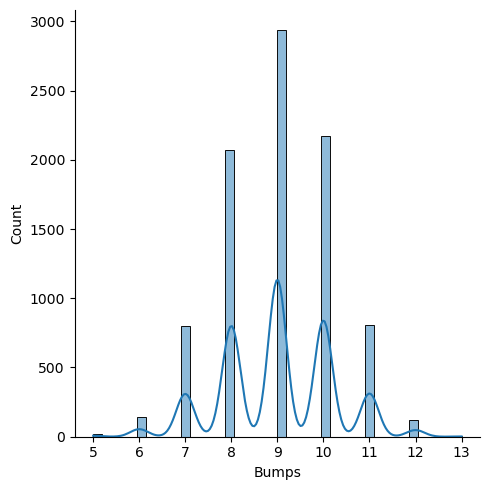

In [5]:
sns.displot(data=token_bumps, x='Bumps', kde=True)

remarks:
1. what is the threshold for considering a plot as bumpy or not?
2. Only considering the sign is not enough. For example in the case of 'a' and 'aa', they both have the same number of bumps but the plot of 'a' is much smoother than 'aa'.

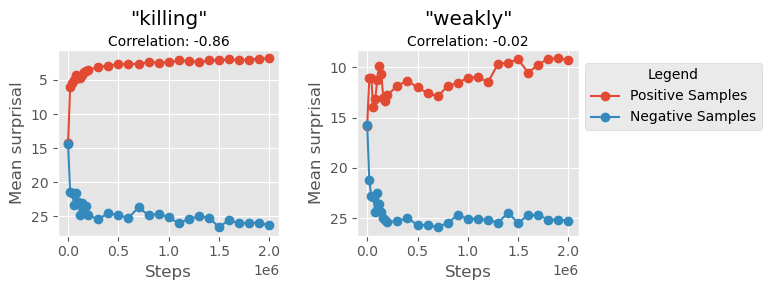

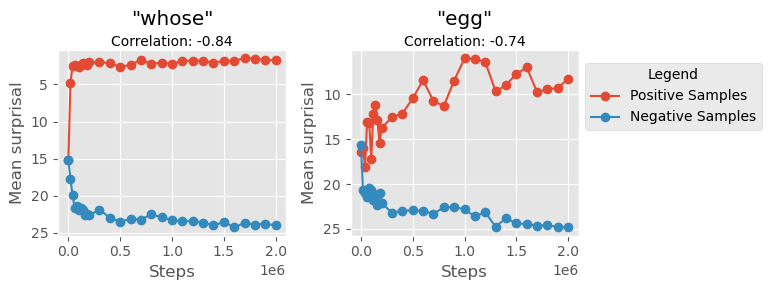

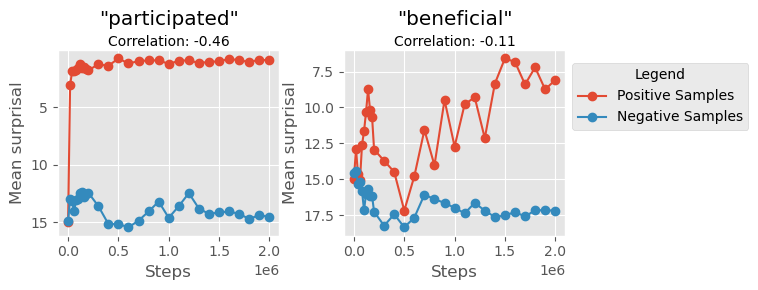

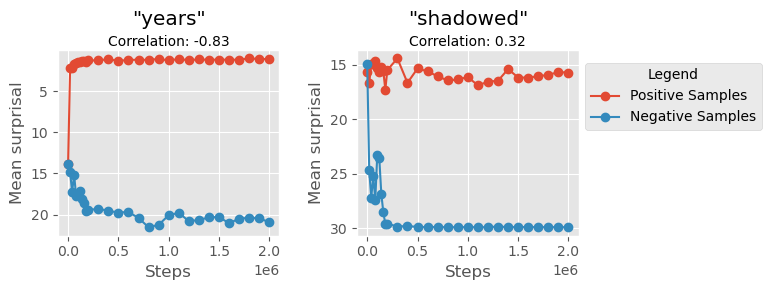

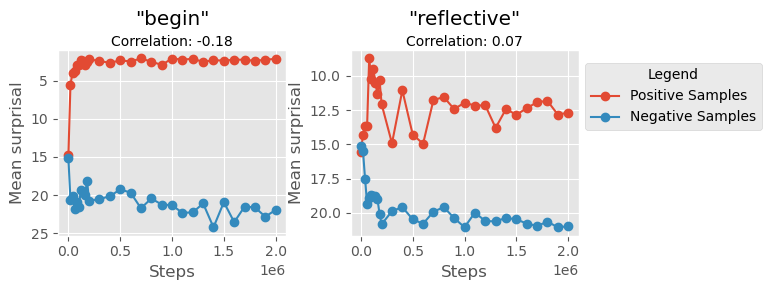

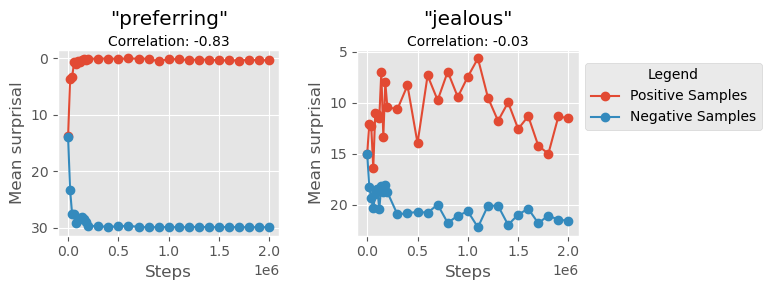

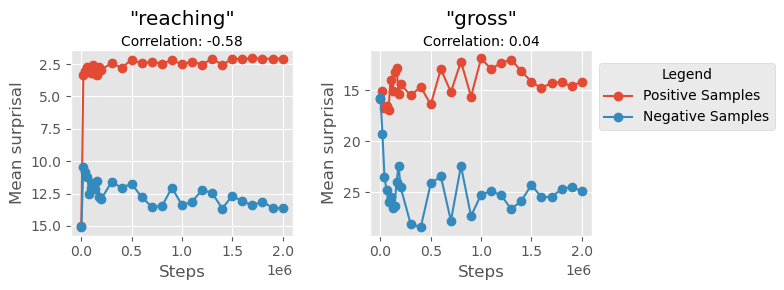

{'reaching': -0.5836995785535153, 'gross': 0.04083670485967648}

In [6]:
plot_surprisals(['killing', 'weakly'], surprisals, neg_samples=True, first_step=False)           # 6 bumps
plot_surprisals(['whose', 'egg'], surprisals, neg_samples=True, first_step=False)                # 7 bumps (also: 'forecast' - 'pioneering')
plot_surprisals(['participated', 'beneficial'], surprisals, neg_samples=True, first_step=False)  # 8 bumps (also: 'landfall', 'defeating', 'tow', 'pairs' - 'symmetrical', 'melee')
plot_surprisals(['years', 'shadowed'], surprisals, neg_samples=True, first_step=False)           # 9 bumps (also: 'game', 'different', 'given', 'poet' - 'conditioned', 'unharmed', 'remarkably')
plot_surprisals(['begin', 'reflective'], surprisals, neg_samples=True, first_step=False)         # 10 bumps (also: 'bonus', 'practice' - 'offs')
plot_surprisals(['preferring', 'jealous'], surprisals, neg_samples=True, first_step=False)       # 11 bumps (also: 'purely', 'tactic', 'religious' - 'ski')
plot_surprisals(['reaching', 'gross'], surprisals, neg_samples=True, first_step=False)           # 12 bumps (also: 'our', 'already', 'projects', 'themselves' - 'setup', 'greens')